In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/real-estate/Real_Estate_Sales_2001-2022_GL.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42


In [ ]:
# Load the dataset
file_path = "/kaggle/input/real-estate/Real_Estate_Sales_2001-2022_GL.csv"
df = pd.read_csv(file_path)

# Preview
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,120011,2012,10/16/2012,Windham,17 CLARK ST,32430,20000.0,1.621500,NaN,NaN,NaN,NaN,NaN,NaN
1,120049,2012,11/15/2012,Branford,13 NORTH MAIN ST,110700,275000.0,0.402545,NaN,NaN,NaN,NaN,NaN,NaN
2,120131,2012,12/13/2012,Hamden,36 SCHOOL ST,157010,340000.0,0.461794,NaN,NaN,NaN,4 FAMILY,NaN,NaN
3,122296,2012,2/19/2013,Guilford,2455 BOSTON POST RD,478960,387000.0,1.237623,NaN,NaN,NaN,NaN,NaN,NaN
4,120175,2012,1/2/2013,Hamden,34 RACCIO PARK RD U6,69230,106000.0,0.653113,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495211 entries, 0 to 495210
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     495211 non-null  int64  
 1   List Year         495211 non-null  int64  
 2   Date Recorded     495211 non-null  object 
 3   Town              495211 non-null  object 
 4   Address           495208 non-null  object 
 5   Assessed Value    495211 non-null  int64  
 6   Sale Amount       495211 non-null  float64
 7   Sales Ratio       495211 non-null  float64
 8   Property Type     463697 non-null  object 
 9   Residential Type  452580 non-null  object 
 10  Non Use Code      152002 non-null  object 
 11  Assessor Remarks  118127 non-null  object 
 12  OPM remarks       11422 non-null   object 
 13  Location          143395 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 52.9+ MB


In [ ]:
# Check nulls
df.isnull().sum()

# Encode categoricals
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495211 entries, 0 to 495210
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     495211 non-null  int64  
 1   List Year         495211 non-null  int64  
 2   Date Recorded     495211 non-null  int64  
 3   Town              495211 non-null  int64  
 4   Address           495211 non-null  int64  
 5   Assessed Value    495211 non-null  int64  
 6   Sale Amount       495211 non-null  float64
 7   Sales Ratio       495211 non-null  float64
 8   Property Type     495211 non-null  int64  
 9   Residential Type  495211 non-null  int64  
 10  Non Use Code      495211 non-null  int64  
 11  Assessor Remarks  495211 non-null  int64  
 12  OPM remarks       495211 non-null  int64  
 13  Location          495211 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 52.9 MB


Descriptive Statistics:
       Serial Number      List Year  Date Recorded           Town  \
count   4.952110e+05  495211.000000  495211.000000  495211.000000   
mean    8.928122e+05    2016.907698    1745.549943      86.525536   
std     9.506958e+06       2.853045     963.282198      47.132218   
min     2.100000e+01    2012.000000       0.000000       0.000000   
25%     1.301420e+05    2014.000000     874.000000      49.000000   
50%     1.606640e+05    2017.000000    1846.000000      87.000000   
75%     1.910790e+05    2019.000000    2582.000000     131.000000   
max     2.000500e+09    2022.000000    3304.000000     168.000000   

             Address  Assessed Value   Sale Amount    Sales Ratio  \
count  495211.000000    4.952110e+05  4.952110e+05  495211.000000   
mean   202824.389093    3.181017e+05  4.479264e+05       2.626547   
std    117111.621558    2.044436e+06  7.537644e+06     401.108071   
min         0.000000    0.000000e+00  0.000000e+00       0.000000   
25%    10

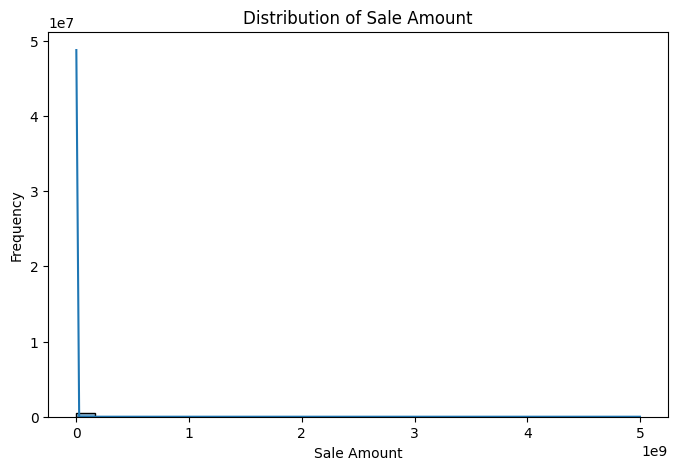

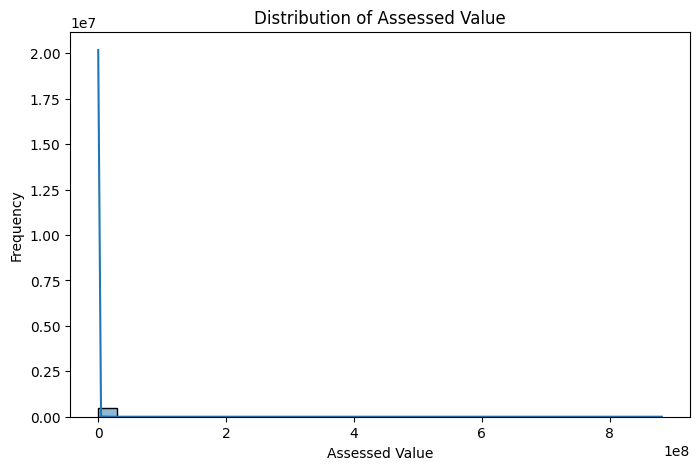

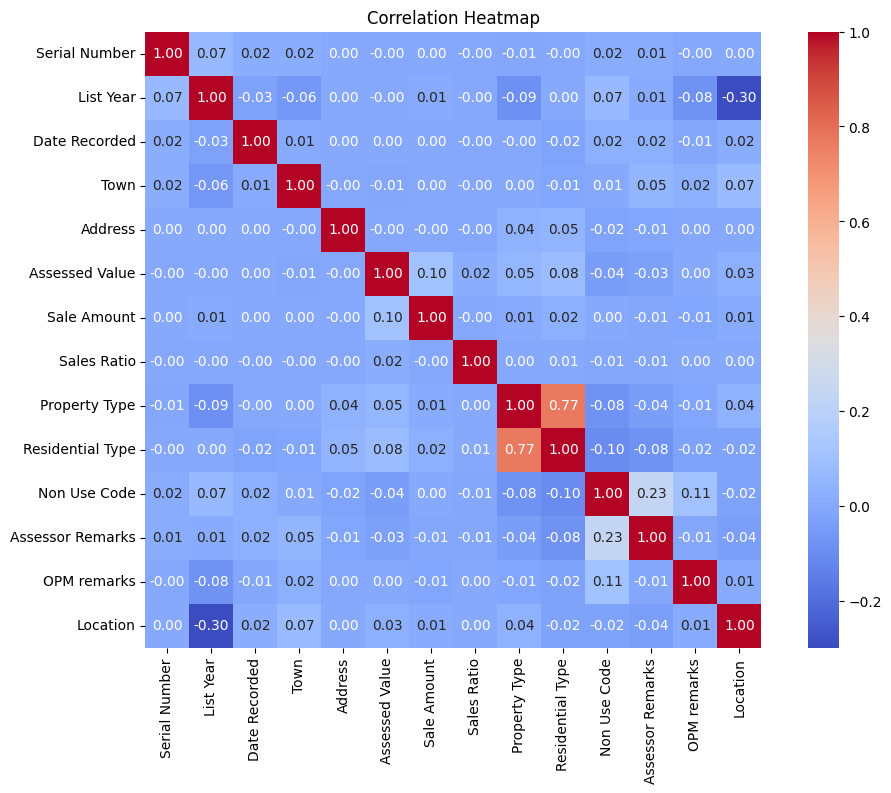

In [ ]:
# ============================
# 3. Exploratory Data Analysis (EDA)
# ============================
"""
Before preprocessing, let's explore the dataset:
- Check basic statistics
- Visualize distributions of key variables
- Examine correlations among features
"""

# Basic statistics
print("Descriptive Statistics:")
print(df.describe())

# Distribution of target variable: Sale Amount
plt.figure(figsize=(8, 5))
sns.histplot(df['Sale Amount'], kde=True, bins=30)
plt.title("Distribution of Sale Amount")
plt.xlabel("Sale Amount")
plt.ylabel("Frequency")
plt.show()

# Distribution of Assessed Value (as an example)
plt.figure(figsize=(8, 5))
sns.histplot(df['Assessed Value'], kde=True, bins=30)
plt.title("Distribution of Assessed Value")
plt.xlabel("Assessed Value")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


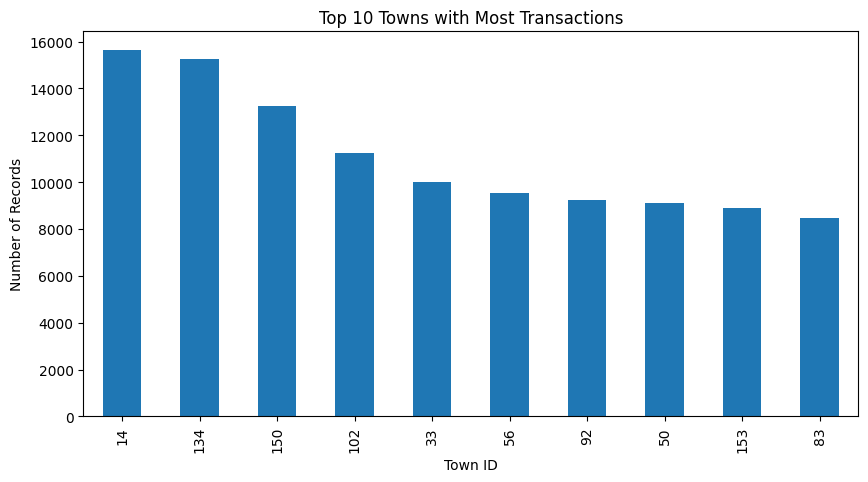

In [ ]:
df['Town'].value_counts().head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Towns with Most Transactions')
plt.xlabel('Town ID')
plt.ylabel('Number of Records')
plt.show()



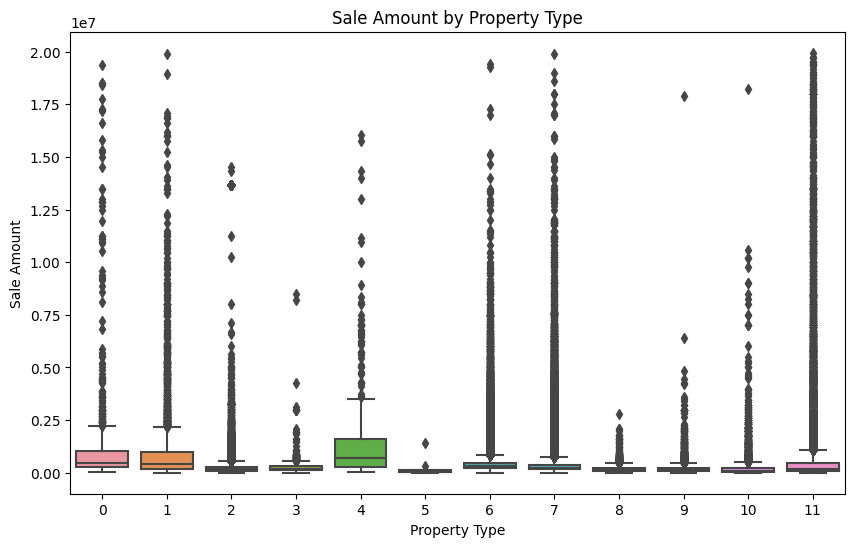

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property Type', y='Sale Amount', data=df[df['Sale Amount'] < 2e7])  # filtering extreme outliers
plt.title('Sale Amount by Property Type')
plt.show()


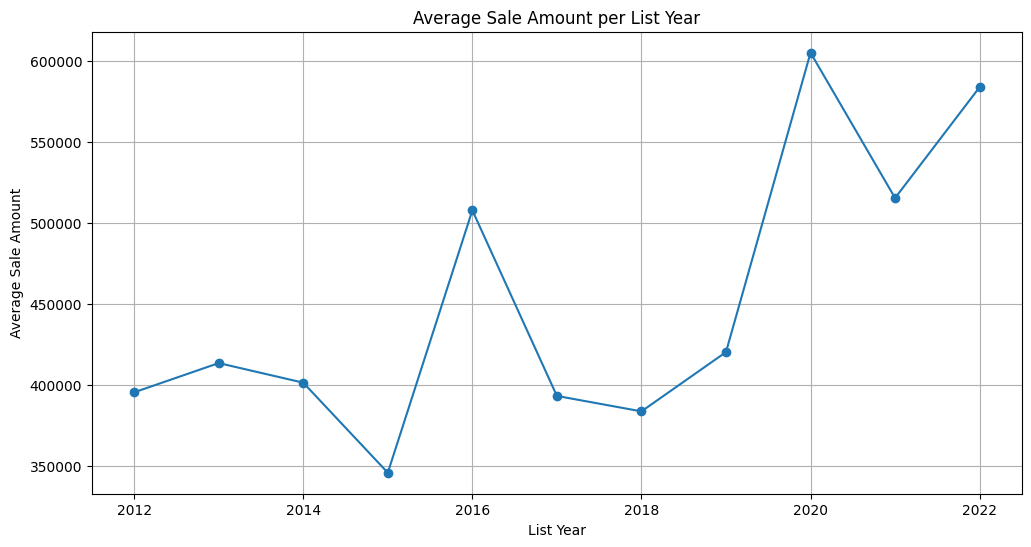

In [ ]:
yearly_sales = df.groupby('List Year')['Sale Amount'].mean()

plt.figure(figsize=(12, 6))
yearly_sales.plot(marker='o')
plt.title('Average Sale Amount per List Year')
plt.ylabel('Average Sale Amount')
plt.grid(True)
plt.show()


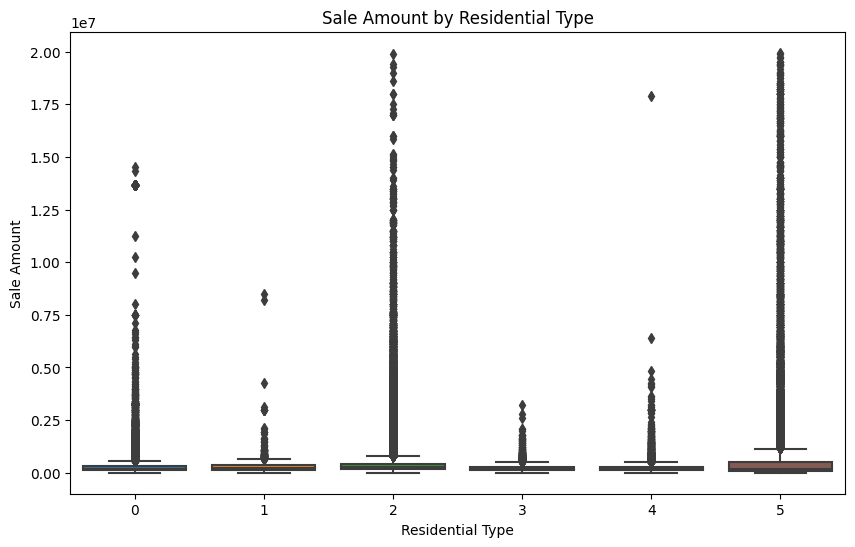

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Residential Type', y='Sale Amount', data=df[df['Sale Amount'] < 2e7])
plt.title('Sale Amount by Residential Type')
plt.show()


In [ ]:
# ============================
# 4. Preprocessing & Cleanup
# ============================
"""
Clean the data:
- Drop irrelevant/ID-like columns such as 'Serial Number' and 'Address'.
- Since all columns are numeric and non-null, no imputation is needed.
"""

# Drop ID-like columns
df = df.drop(columns=['Serial Number', 'Address'])

# Confirm no missing values
print("Missing values after cleanup:")
print(df.isnull().sum())


Missing values after cleanup:
List Year           0
Date Recorded       0
Town                0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Non Use Code        0
Assessor Remarks    0
OPM remarks         0
Location            0
dtype: int64


In [ ]:
# ============================
# 5. Feature Selection & Splitting
# ============================
"""
Select features and target variable.
Here, 'Sale Amount' is the target.
Other columns serve as features.
"""

target = 'Sale Amount'
X = df.drop(columns=[target])
y = df[target]

# Train-Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
print("Train-Test shapes:", X_train.shape, X_test.shape)


Train-Test shapes: (396168, 11) (99043, 11)


In [ ]:
# ============================
# 6. Scaling for Linear Regression
# ============================
"""
Tree-based models work with raw features, but Linear Regression benefits from scaling.
We use StandardScaler to standardize our features.
"""

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# ============================
# 7. Model Building & Evaluation
# ============================
"""
We build three models using preset parameters to avoid heavy tuning, which may crash Kaggle's RAM.
Evaluation metrics used: RMSE and R2 score.
"""

# ----- A. Linear Regression -----
print("\n--- Linear Regression ---")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
r2_lr = r2_score(y_test, pred_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)




--- Linear Regression ---
Linear Regression RMSE: 3356171.357588687
Linear Regression R2: 0.08572104872706254


In [ ]:
# ----- B. Random Forest -----
print("\n--- Random Forest ---")
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)





--- Random Forest ---
Random Forest RMSE: 1401061.2754948258
Random Forest R2: 0.8406673691030037


In [ ]:
# ----- C. XGBoost -----
print("\n--- XGBoost ---")
xgb = XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.1, random_state=RANDOM_STATE, verbosity=0)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
r2_xgb = r2_score(y_test, pred_xgb)
print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R2:", r2_xgb)


--- XGBoost ---
XGBoost RMSE: 1585291.0812094698
XGBoost R2: 0.7960101772093815


In [ ]:
# ----- C. XGBoost -----
print("\n--- XGBoost ---")
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=RANDOM_STATE, verbosity=0)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
r2_xgb = r2_score(y_test, pred_xgb)
print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R2:", r2_xgb)


--- XGBoost ---
XGBoost RMSE: 1498128.4846450847
XGBoost R2: 0.8178250784553907


In [ ]:
# ============================
# 8. Results Summary
# ============================
"""
Summarize model performance.
This helps compare the models based on RMSE and R2 metrics.
"""

print("\n\n--- Model Performance Summary ---")
print(f"Linear Regression: RMSE = {rmse_lr:.2f}, R2 = {r2_lr:.2f}")
print(f"Random Forest:     RMSE = {rmse_rf:.2f}, R2 = {r2_rf:.2f}")
print(f"XGBoost:           RMSE = {rmse_xgb:.2f}, R2 = {r2_xgb:.2f}")




--- Model Performance Summary ---
Linear Regression: RMSE = 3356171.36, R2 = 0.09
Random Forest:     RMSE = 1401061.28, R2 = 0.84
XGBoost:           RMSE = 1498128.48, R2 = 0.82


In [ ]:
from sklearn.metrics import mean_absolute_error

# ----- Linear Regression Metrics -----
mae_lr = mean_absolute_error(y_test, pred_lr)
mape_lr = np.mean(np.abs((y_test - pred_lr) / y_test)) * 100

# ----- Random Forest Metrics -----
mae_rf = mean_absolute_error(y_test, pred_rf)
mape_rf = np.mean(np.abs((y_test - pred_rf) / y_test)) * 100

# ----- XGBoost Metrics -----
mae_xgb = mean_absolute_error(y_test, pred_xgb)
mape_xgb = np.mean(np.abs((y_test - pred_xgb) / y_test)) * 100


In [ ]:
print("\n\n--- Model Performance Summary ---")
print(f"{'Model':<18} {'RMSE':>12} {'R2':>10} {'MAE':>12} {'MAPE (%)':>12}")
print("-" * 64)
print(f"{'Linear Regression':<18} {rmse_lr:12.2f} {r2_lr:10.2f} {mae_lr:12.2f} {mape_lr:12.2f}")
print(f"{'Random Forest':<18} {rmse_rf:12.2f} {r2_rf:10.2f} {mae_rf:12.2f} {mape_rf:12.2f}")
print(f"{'XGBoost':<18} {rmse_xgb:12.2f} {r2_xgb:10.2f} {mae_xgb:12.2f} {mape_xgb:12.2f}")




--- Model Performance Summary ---
Model                      RMSE         R2          MAE     MAPE (%)
----------------------------------------------------------------
Linear Regression    3356171.36       0.09    371526.48          inf
Random Forest        1401061.28       0.84     37579.79          inf
XGBoost              1498128.48       0.82     62612.55          inf


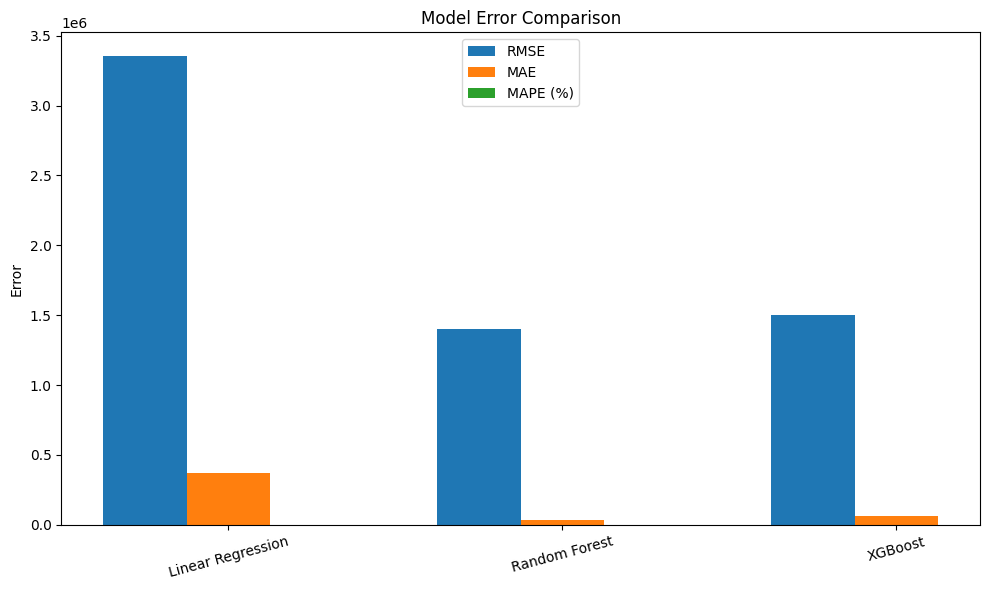

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'XGBoost']
rmse_values = [rmse_lr, rmse_rf, rmse_xgb]
mae_values = [mae_lr, mae_rf, mae_xgb]
mape_values = [mape_lr, mape_rf, mape_xgb]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, rmse_values, width, label='RMSE')
plt.bar(x, mae_values, width, label='MAE')
plt.bar(x + width, mape_values, width, label='MAPE (%)')

plt.ylabel('Error')
plt.title('Model Error Comparison')
plt.xticks(x, models, rotation=15)
plt.legend()
plt.tight_layout()
plt.show()


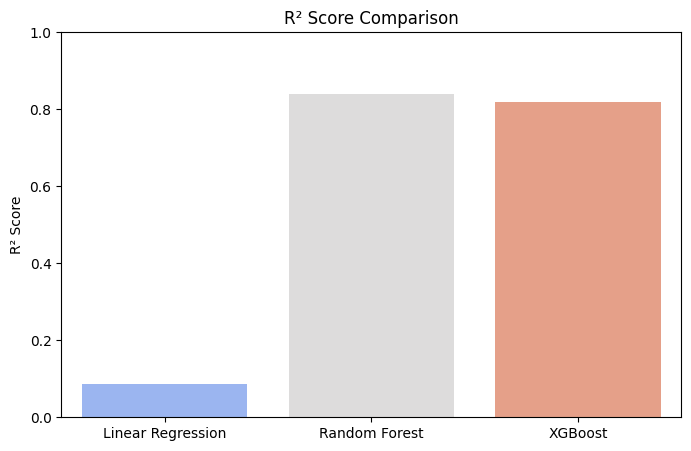

In [ ]:
r2_values = [r2_lr, r2_rf, r2_xgb]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=r2_values, palette='coolwarm')
plt.ylabel('R² Score')
plt.title('R² Score Comparison')
plt.ylim(0, 1)
plt.show()


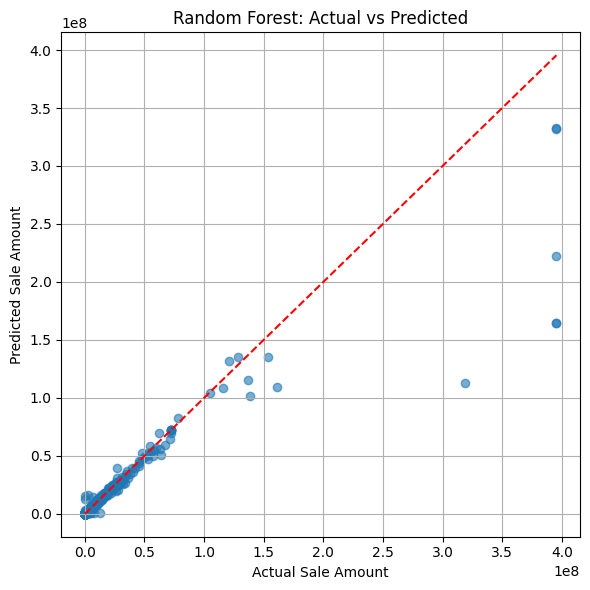

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


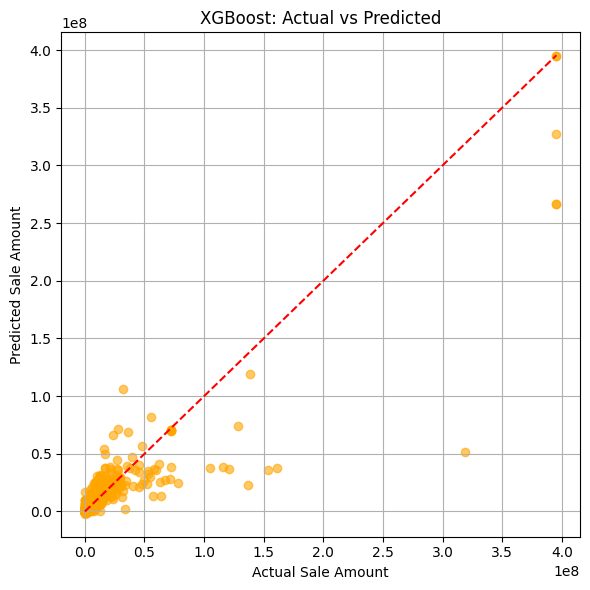

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, pred_xgb, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()
